In [2]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing


In [36]:
users = pd.read_csv("usersClassification.csv", sep=';')

users.dropna(axis="rows", how="any", inplace=True)

users['mes_sum'] = users['mes_from'] + users['mes_to']

u2 = users.drop_duplicates(subset=['id', 'user_id'], keep="last")

print(len(u2))

28233


In [49]:
u4 = u2[['mes_pre_sum', 'friends_pre', 'log_pre', 'sum_changes', 'mfr_pre', 'mto_pre', 'mes_from', 'mes_to','V1', 'V2', 'V3', 'V4', 'V5', 'user_class']]


# min_max_scaler = preprocessing.MinMaxScaler()
# u4[['fre_log_pre', 'fre_avatar', 'sumch_log_pre','mes_to_mes_from', 'fr_by_mes_from', 'fr_by_mes_to', 'fr_by_mes', 'V1', 'V2', 'V3', 'V4', 'V5']] = min_max_scaler.fit_transform(u4[['fre_log_pre', 'fre_avatar', 'sumch_log_pre','mes_to_mes_from', 'fr_by_mes_from',  'fr_by_mes_to', 'fr_by_mes', 'V1', 'V2', 'V3', 'V4', 'V5']])


# u4 = u4[~(u4 == 0).any(axis=1)]

print(len(u4))


# u4[['fre_log_pre', 'fre_avatar', 'sumch_log_pre','mes_to_mes_from',  'fr_by_mes_to', 'fr_by_mes', 'V1', 'V2', 'V3', 'V4', 'V5']] = np.log10(u4[['fre_log_pre', 'fre_avatar', 'sumch_log_pre','mes_to_mes_from',  'fr_by_mes_to', 'fr_by_mes', 'V1', 'V2', 'V3', 'V4', 'V5']])


28233


In [88]:
print(u4)

       fre_log_pre  fre_avatar  sumch_log_pre  mes_to_mes_from  \
0        -1.440392   -1.560667      -2.301030        -2.397940   
3        -2.349701   -2.602060      -2.522879        -2.233587   
4        -2.639735   -2.079181      -1.602060        -1.795880   
7        -1.901351   -1.800428      -2.045757        -2.096910   
10       -1.815284   -2.079181      -2.397940        -2.193820   
11       -2.259524   -2.778151      -2.698970        -2.096910   
12       -2.542825   -2.380211      -2.045757        -1.795880   
14       -1.993822   -2.778151      -3.000000        -1.941574   
15       -2.278008   -3.079181      -3.000000        -2.193820   
20       -1.782403   -2.477121      -2.698970        -2.096910   
28       -1.780898   -2.602060      -3.000000        -2.096910   
31       -3.037675   -2.477121      -1.585027        -2.698970   
32       -1.374918   -1.823909      -2.522879        -2.318759   
38       -1.374918   -1.848732      -2.698970        -2.318759   
41       -

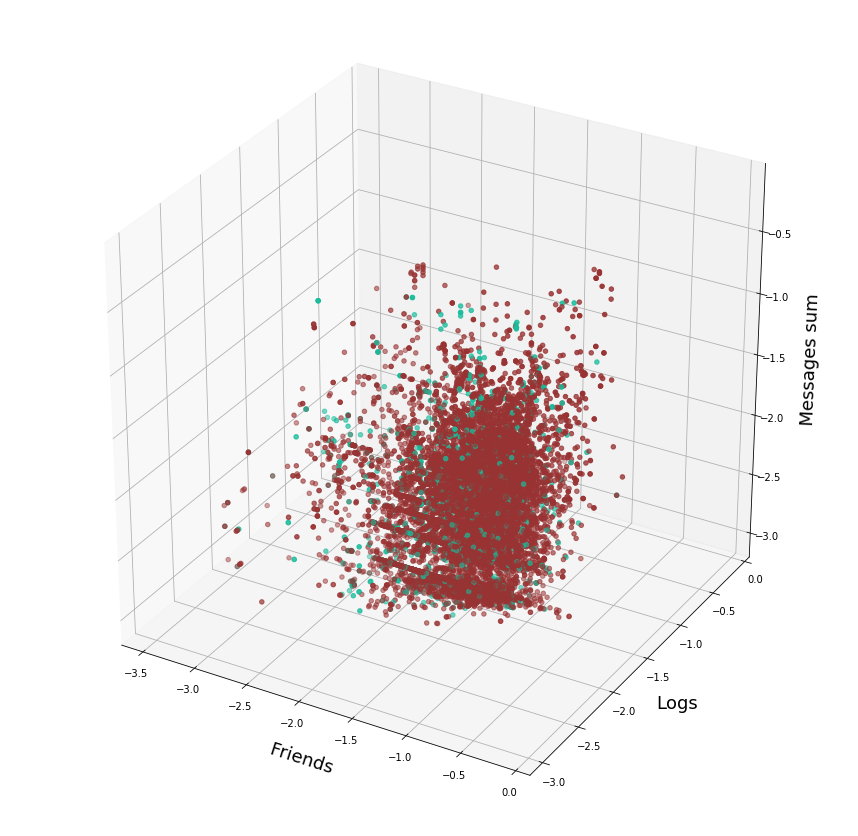

In [112]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

colors = []


for index, row in u4.iterrows(): 
    if row['user_class'] == 'innovator':
        colors.append('#19bc9c')
    if row['user_class'] == 'early adopter':
        colors.append('#19bc9c')
    if row['user_class'] == 'early majority':
        colors.append('#993333')
    if row['user_class'] == 'late majority':
        colors.append('#993333')
    if row['user_class'] == 'laggards':
        colors.append('#993333')

        
# u4 = u3[['friends','logs', 'mgs_sum']]

        
# u4 = np.log2(u4)

ax = plt.axes(projection='3d')

# ax.zaxis._set_scale('log') 
# ax.xaxis._set_scale('log') 
# ax.yaxis._set_scale('log') 


# Data for three-dimensional scattered points
# zdata = users_3['friends']
# xdata = users_3['mgs_sum']
# ydata = users_3['logs']

ax.set_xlabel('Friends', labelpad=14)
ax.set_ylabel('Logs', labelpad=14)
ax.set_zlabel('Messages sum', labelpad=16)

ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.zaxis.label.set_size(18)


xdata = u4['V1']
ydata = u4['V3']
zdata = u4['V5']

ax.scatter3D(xdata, ydata, zdata, color=colors);

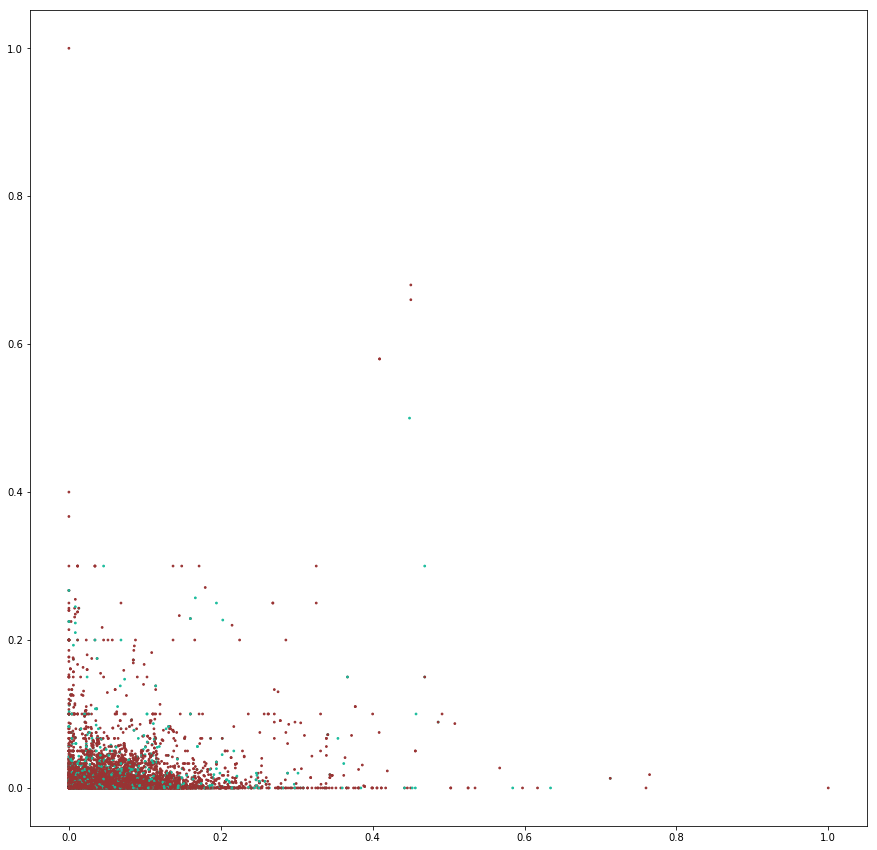

In [125]:
fig, ax0 = plt.subplots(figsize=(15,15))

# users_3 = users[['friends','logs', 'mgs_sum', 'title']]

# dataX0 = list(range(len(users_3['friends'])))
# dataX1 = list(range(len(users_3['mgs_sum'])))


# print(len(dataX0))
# print(len(dataX1))

# # u3 = users_3.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

# # ax0.set_yscale('log')
# colors = []

# for index, row in users_3.iterrows(): 
#     if row[3] == 'innovator':
#         colors.append('#19bc9c')
#     if row[3] == 'early adopter':
#         colors.append('#f1c40e')
#     if row[3] == 'early majority':
#         colors.append('#993333')
#     if row[3] == 'late majority':
#         colors.append('#803399')
#     if row[3] == 'laggards':
#         colors.append('#339933')
        
        
ax0.scatter(u4['V1'], u4['V5'], s=3, color=colors)
# ax0.scatter(u3['mgs_sum'], u3['logs'], s=2, color="#19bc9c")
# ax0.scatter(u3['logs'], u3['mgs_sum'], s=2, color="#19bc9c")
# ax0.scatter(u3['logs'], u3['friends'], s=2, color="#19bc9c")



# ax0.scatter(dataX0 , u3['friends'], s=2, color="#19bc9c")

# ax0.spines['right'].set_visible(False)

# ax0.spines['top'].set_visible(False)

# ax0.xaxis.set_tick_params(labelsize=14)
# ax0.yaxis.set_tick_params(labelsize=14)

# ax0.legend(('friends', 'mgs_sum'), prop={'size': 14}, frameon=True,  loc='upper left')
# z = np.polyfit(dataX0, dataY0, 1)
# p = np.poly1d(z)


# ax0.set_yscale('log')


In [13]:
# print(u4.loc[u2['user_class'] == 'innovator'][0:500])
# print(u4.groupby(['user_class']).size())

frames = [
    u4.loc[u2['user_class'] == 'laggards'][0:500],
    u4.loc[u2['user_class'] == 'innovator'][0:500],
    u4.loc[u2['user_class'] == 'early adopter'][0:500], 
    u4.loc[u2['user_class'] == 'early majority'][0:500],
    u4.loc[u2['user_class'] == 'late majority'][0:500]
    ]

a = pd.concat(frames)

In [14]:
from sklearn.cluster import KMeans,MiniBatchKMeans
from collections import Counter

# create kmeans object

# kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans = MiniBatchKMeans(n_clusters=5, max_iter=1000)



# fit kmeans object to data
kmeans.fit(a[['V1', 'V2', 'V3', 'V4', 'V5']])

# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)

# print(np.transpose(kmeans.cluster_centers_))
a['cluster'] = kmeans.labels_
# test = u4.groupby('user_class')['cluster'].nunique()
print(a.groupby(['user_class', 'cluster']).size())


# save new clusters for chart
# y_km = kmeans.fit_predict(u4[['friends_pre', 'log_pre', 'mes_from']])
# labels = kmeans.predict(u4[['friends_pre', 'log_pre', 'mes_from']])

# fig, ax0 = plt.subplots(figsize=(5,7))


# ax0.plot(np.transpose(kmeans.cluster_centers_))

user_class      cluster
early adopter   0          339
                1            3
                2           23
                3            5
                4          130
early majority  0          317
                1            1
                2           41
                3            4
                4          137
innovator       0          376
                2           10
                4          114
laggards        0          285
                1            1
                2           35
                3            1
                4          178
late majority   0          268
                1            5
                2           42
                3            2
                4          183
dtype: int64


In [81]:
from sklearn.mixture import GaussianMixture #For GMM clustering


# create kmeans object
kmeans = GaussianMixture(n_components=3, init_params='kmeans')
# fit kmeans object to data
kmeans.fit(a[['friends_pre', 'log_pre', 'mes_from', 'ch_adopt_log_pre']])
clust_labels3 = kmeans.predict(a[['friends_pre', 'log_pre', 'mes_from', 'ch_adopt_log_pre']])

# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)

print()

# print(np.transpose(kmeans.cluster_centers_))
a['cluster'] = clust_labels3
# test = u4.groupby('user_class')['cluster'].nunique()
print(a.groupby(['user_class', 'cluster']).size())


# save new clusters for chart
# y_km = kmeans.fit_predict(u4[['friends_pre', 'log_pre', 'mes_from']])
# labels = kmeans.predict(u4[['friends_pre', 'log_pre', 'mes_from']])

# fig, ax0 = plt.subplots(figsize=(5,7))


# ax0.plot(np.transpose(kmeans.cluster_centers_))

KeyError: "['mes_from'] not in index"

In [31]:
import hdbscan


clusterer = hdbscan.HDBSCAN(min_cluster_size=12, min_samples=10, alpha=0.01,leaf_size=1)
cluster_labels = clusterer.fit_predict(a[['V1', 'V2', 'V3', 'V4', 'V5']])

a['cluster'] = cluster_labels
print(a.groupby(['user_class', 'cluster']).size())


user_class      cluster
early adopter   -1         180
                 0          16
                 2           4
                 3         300
early majority  -1         199
                 0          19
                 1           7
                 2           6
                 3         269
innovator       -1         118
                 0           9
                 1           4
                 2           6
                 3         363
laggards        -1         220
                 0           8
                 1           3
                 2          13
                 3         256
late majority   -1         220
                 0          10
                 1           3
                 2           3
                 3         264
dtype: int64


In [96]:
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

# create kmeans object
kmeans = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# fit kmeans object to data
# kmeans.fit(u4[['friends_pre', 'log_pre', 'mes_from', 'ch_adopt_log_pre', 's_adopt_log_pre', 'sr_adopt_log_pre', 'premium_app']])
kmeans.fit(a[['friends_pre', 'log_pre', 'mes_sum', 'ch_adopt_log_pre']])

# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)

# print(np.transpose(kmeans.cluster_centers_))
a['cluster'] = kmeans.labels_
# test = u4.groupby('user_class')['cluster'].nunique()
print(a.groupby(['user_class', 'cluster']).size())


# save new clusters for chart
# y_km = kmeans.fit_predict(u4[['friends_pre', 'log_pre', 'mes_from']])
# labels = kmeans.predict(u4[['friends_pre', 'log_pre', 'mes_from']])

# fig, ax0 = plt.subplots(figsize=(5,7))


# ax0.plot(np.transpose(kmeans.cluster_centers_))

user_class      cluster
early adopter   0          104
                1          390
                2            6
early majority  0           85
                1          414
                2            1
innovator       0          161
                1          335
                2            4
laggards        0          107
                1          392
                2            1
late majority   0           77
                1          421
                2            2
dtype: int64


In [45]:
from collections import Counter
from sklearn.cluster import Birch

# create kmeans object
kmeans = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=5, threshold=0.1)
# fit kmeans object to data
kmeans.fit(a[['mes_pre_sum', 'friends_pre', 'log_pre', 'sum_changes', 'mfr_pre', 'mto_pre','mes_from', 'mes_to','V1', 'V2', 'V3', 'V4', 'V5']])


# kmeans.fit(u4[['friends_pre', 'log_pre', 'mes_from', 'ch_adopt_log_pre']])

# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)

# print(np.transpose(kmeans.cluster_centers_))
a['cluster'] = kmeans.labels_
# test = u4.groupby('user_class')['cluster'].nunique()
print(a.groupby(['user_class', 'cluster']).size())


# save new clusters for chart
# y_km = kmeans.fit_predict(u4[['friends_pre', 'log_pre', 'mes_from']])
# labels = kmeans.predict(u4[['friends_pre', 'log_pre', 'mes_from']])

# fig, ax0 = plt.subplots(figsize=(5,7))


# ax0.plot(np.transpose(kmeans.cluster_centers_))

KeyError: "['mes_pre_sum' 'friends_pre' 'log_pre' 'sum_changes' 'mfr_pre' 'mto_pre'\n 'mes_from' 'mes_to'] not in index"

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

data =  u4[['mes_pre_sum', 'friends_pre', 'log_pre', 'sum_changes', 'mfr_pre', 'mto_pre', 'mes_from', 'mes_to','V1', 'V2', 'V3', 'V4', 'V5']]

X_train, X_test, y_train, y_test = train_test_split(data, u4[['user_class']], test_size=0.2, random_state=2)

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(25, weights=weights)
    clf.fit(X_train, y_train)
#     print(clf.predict(X_test))
    print(clf.score(X_test, y_test))

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.347795289534
0.426598193731


In [70]:
from sklearn.ensemble import RandomForestClassifier

data =  u4[['mes_pre_sum', 'friends_pre', 'log_pre', 'sum_changes', 'mfr_pre', 'mto_pre', 'mes_from', 'mes_to','V1', 'V2', 'V3', 'V4', 'V5']]


X_train, X_test, y_train, y_test = train_test_split(data, u4[['user_class']], test_size=0.25, random_state=0)

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.436039099023


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split

data =  u4[['mes_pre_sum', 'friends_pre', 'log_pre', 'sum_changes', 'mfr_pre', 'mto_pre', 'mes_from', 'mes_to','V1', 'V2', 'V3', 'V4', 'V5']]

clf = svm.SVC(gamma=2, C=10)
scores = cross_val_score(clf, data , u4[['user_class']], cv=5)
scores.mean()                                             


In [51]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(u4[['friends_pre', 'log_pre', 'mes_from', 'ch_adopt_log_pre', 's_adopt_log_pre', 'sr_adopt_log_pre', 'premium_app']], u4[['user_class']], test_size=0.5, random_state=0)



y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(gnb.score(X_test, y_test))

NameError: name 'train_test_split' is not defined

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

data =  u4[['mes_pre_sum', 'friends_pre', 'log_pre', 'sum_changes', 'mfr_pre', 'mto_pre', 'mes_from', 'mes_to','V1', 'V2', 'V3', 'V4', 'V5']]


mlp = MLPClassifier(hidden_layer_sizes=(30,60,40))

X_train, X_test, y_train, y_test = train_test_split(data, u4[['user_class']], test_size=0.1, random_state=2)

mlp.fit(X_train,y_train)

print(mlp.score(X_test, y_test))

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.347025495751


In [337]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, u4[['friends_pre', 'log_pre', 'mes_from', 'ch_adopt_log_pre', 's_adopt_log_pre', 'sr_adopt_log_pre', 'premium_app']], u4[['user_class']], cv=10)
scores.mean() 

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

0.43931371496417382

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=109, max_depth=None, min_samples_split=5, random_state=2)

data =  u4[['mes_pre_sum', 'friends_pre', 'log_pre', 'sum_changes', 'mfr_pre', 'mto_pre', 'mes_from', 'mes_to','V1', 'V2', 'V3', 'V4', 'V5']]

X_train, X_test, y_train, y_test = train_test_split(data, u4[['user_class']], test_size=0.35, random_state=2)



y_pred = etc.fit(X_train, y_train).predict(X_test)

print(etc.score(X_test, y_test))

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.433009512244
